2-arms test

{
    "model_name": "bootstrapped_ucb.2023.05.15.17.14.24",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/att.lte.driving.2016.bootstrapped_ucb.2023.05.16.19.13.16.csv",
    "timestamp": "2023.05.16.19.13.16",
    "trace_name": "att.lte.driving.2016.bootstrapped_ucb.2023.05.16.19.13.16.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.15.21.45.42",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/tm.lte.driving.bootstrapped_ucb.2023.05.17.11.48.42.csv",
    "timestamp": "2023.05.17.11.48.42",
    "trace_name": "tm.lte.driving.bootstrapped_ucb.2023.05.17.11.48.42.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.16.04.52.08",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/vz.lte.driving.bootstrapped_ucb.2023.05.17.11.52.09.csv",
    "timestamp": "2023.05.17.11.52.09",
    "trace_name": "vz.lte.driving.bootstrapped_ucb.2023.05.17.11.52.09.csv"
},


3-arms test

{
    "model_name": "bootstrapped_ucb.2023.05.16.09.41.01",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/att.lte.driving.2016.bootstrapped_ucb.2023.05.17.12.16.00.csv",
    "timestamp": "2023.05.17.12.16.00",
    "trace_name": "att.lte.driving.2016.bootstrapped_ucb.2023.05.17.12.16.00.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.16.11.28.01",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/tm.lte.driving.bootstrapped_ucb.2023.05.17.12.19.33.csv",
    "timestamp": "2023.05.17.12.19.33",
    "trace_name": "tm.lte.driving.bootstrapped_ucb.2023.05.17.12.19.33.csv"
},
{
    "model_name": "bootstrapped_ucb.2023.05.16.13.03.08",
    "path": "/home/lorenzo/Desktop/mimic-2/log/mab/trace/vz.lte.driving.bootstrapped_ucb.2023.05.17.12.27.15.csv",
    "timestamp": "2023.05.17.12.27.15",
    "trace_name": "vz.lte.driving.bootstrapped_ucb.2023.05.17.12.27.15.csv"
}

Native protocols

att.lte.driving.2016.cubic.2023.04.22.16.45.52
tm.lte.driving.cubic.2023.04.22.12.35.40
vz.lte.driving.cubic.2023.04.22.12.40.57

att.lte.driving.2016.bbr.2023.04.22.12.47.35
tm.lte.driving.bbr.2023.04.22.12.48.38
vz.lte.driving.bbr.2023.04.22.12.52.55

att.lte.driving.2016.hybla.2023.04.22.12.59.29
tm.lte.driving.hybla.2023.04.22.13.00.40
vz.lte.driving.hybla.2023.04.22.13.05.53

Plot to generate

2-arms vs 3-arms 

mean (or 95-perc) rtt vs throughput
rtt cdf
throughput cdf

(link capacity?)
kernel vs iperf data

In [53]:
import os
import sys
import json
sys.path.insert(0, os.path.abspath(os.path.join('', os.pardir)))
analysis_dir = os.path.abspath(os.path.join('', os.pardir))
sys.path.insert(0, os.path.abspath(os.path.join(analysis_dir, os.pardir)))
from utils.misc import read_json_file
from src.ml.helper.utils import parse_traces_config
import matplotlib.pyplot as plt

In [54]:
iperf_path = "/home/lorenzo/Desktop/mimic-2/log/iperf"

#  Iperf traces
i_json_2_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.17.15.35.04.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.17.11.48.42.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.17.11.52.09.json"
}

i_json_3_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.17.12.16.00.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.17.12.19.33.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.17.12.27.15.json"
}

i_json_4_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.18.11.35.31.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.18.11.38.14.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.18.11.43.11.json"
}

i_json_5_arms = {
    "att.lte.driving.2016": "att.lte.driving.2016.bootstrapped_ucb.2023.05.22.00.04.03.json",
    "tm.lte.driving": "tm.lte.driving.bootstrapped_ucb.2023.05.22.00.05.15.json",
    "vz.lte.driving": "vz.lte.driving.bootstrapped_ucb.2023.05.22.00.06.19.json"
}

In [55]:
# # Kernel metrics

# history_path = "/home/lorenzo/Desktop/mimic-2/log/mab/history"

# k_json_2_arms = {
#     "att.lte.driving.2016": "bootstrapped_ucb.2023.05.15.17.14.24.2023.05.16.19.13.16.json",
#     "tm.lte.driving": "bootstrapped_ucb.2023.05.15.21.45.42.2023.05.17.11.48.42.json",
#     "vz.lte.driving": "bootstrapped_ucb.2023.05.16.04.52.08.2023.05.17.11.52.09.json"
# }

# k_json_3_arms = {
#     "att.lte.driving.2016": "bootstrapped_ucb.2023.05.16.09.41.01.2023.05.17.12.16.00.json",
#     "tm.lte.driving": "bootstrapped_ucb.2023.05.16.11.28.01.2023.05.17.12.19.33.json",
#     "vz.lte.driving": "bootstrapped_ucb.2023.05.16.13.03.08.2023.05.17.12.27.15.json"
# }

In [56]:
# # Single protocol kernel metrics

# cubic_json = {
#     "att.lte.driving.2016": "test_cubic.2023.04.22.16.45.52.json",
#     "tm.lte.driving": "test_cubic.2023.04.22.12.35.40.json",
#     "vz.lte.driving": "test_cubic.2023.04.22.12.40.57.json"
# }

# bbr_json = {
#     "att.lte.driving.2016": "test_bbr.2023.04.22.12.47.35.json",
#     "tm.lte.driving": "test_bbr.2023.04.22.12.48.38.json",
#     "vz.lte.driving": "test_bbr.2023.04.22.12.52.55.json"
# }

# hybla_json = {
#     "att.lte.driving.2016": "test_hybla.2023.04.22.12.59.29.json",
#     "tm.lte.driving": "test_hybla.2023.04.22.13.00.40.json",
#     "vz.lte.driving": "test_hybla.2023.04.22.13.05.53.json"
# }

In [84]:
# Single protocol iperf metrics

i_cubic_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.cubic.2023.04.22.18.09.38.json",
    "tm.lte.driving": "tm.lte.driving.cubic.2023.04.22.12.35.40.json",
    "vz.lte.driving": "vz.lte.driving.cubic.2023.04.22.12.40.57.json"
}

i_bbr_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.bbr.2023.04.22.12.47.35.json",
    "tm.lte.driving": "tm.lte.driving.bbr.2023.04.22.12.48.38.json",
    "vz.lte.driving": "vz.lte.driving.bbr.2023.04.22.12.52.55.json"
}

i_hybla_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.hybla.2023.04.22.12.59.29.json",
    "tm.lte.driving": "tm.lte.driving.hybla.2023.04.22.13.00.40.json",
    "vz.lte.driving": "vz.lte.driving.hybla.2023.04.22.13.05.53.json"
}

i_vegas_json = {
    "att.lte.driving.2016": "att.lte.driving.2016.vegas.2023.05.18.12.13.10.json",
    "tm.lte.driving": "tm.lte.driving.vegas.2023.05.18.12.14.22.json",
    "vz.lte.driving": "vz.lte.driving.vegas.2023.05.18.12.20.13.json"
}

i_pcc_json = {
    "att.lte.driving.2016": "att.lte.driving.2016pcc.2023.05.22.08.43.47",
    "tm.lte.driving": "tm.lte.driving.pcc.2023.05.22.08.44.58", 
    "vz.lte.driving": "vz.lte.driving.pcc.2023.05.22.08.50.11"
}

In [85]:
def build_features_per_step(json_obj):
    step_array = {}

    for i, step_logs in enumerate(json_obj):
        step_array[i] = []
        for features_vector in step_logs["observation"]["features"]:
            step_array[i].append(features_vector)
    return step_array

def get_features(feature_vector):
    cwnd_values = []
    rtt_values = []
    thr_values = []
    for step in feature_vector.keys():
        for batch in feature_vector[step]:
            cwnd_values.append(batch[0])
            rtt_values.append(batch[1])
            thr_values.append(batch[8])
    return cwnd_values, rtt_values, thr_values

In [93]:
import numpy as np

traces = ["att.lte.driving.2016", "tm.lte.driving", "vz.lte.driving"]
model = "bootstrapped_ucb"
# k_json_dict_2 = {}
# k_json_dict_3 = {}
i_json_dict_2 = {}
i_json_dict_3 = {}
i_json_dict_4 = {}
i_json_dict_5 = {}
# single_prot_dict = {}
i_single_prot_dict = {}

for t in traces:
    i_json_dict_2[t] = read_json_file(os.path.join(iperf_path, i_json_2_arms[t]))
    i_json_dict_3[t] = read_json_file(os.path.join(iperf_path, i_json_3_arms[t]))
    i_json_dict_4[t] = read_json_file(os.path.join(iperf_path, i_json_4_arms[t]))
    i_json_dict_5[t] = read_json_file(os.path.join(iperf_path, i_json_5_arms[t]))
    
# for t in traces:
#     k_json_dict_2[t] = []
#     with open(os.path.join(history_path, k_json_2_arms[t]), 'r') as f1:
#         for line in f1:
#             k_json_dict_2[t].append(json.loads(line))

#     k_json_dict_3[t] = []
#     with open(os.path.join(history_path, k_json_3_arms[t]), 'r') as f2:
#         for line in f2:
#             k_json_dict_3[t].append(json.loads(line))

#  for kernel
# for p in ["cubic", "bbr", "hybla"]:
#     if p == "cubic":
#         p_json = cubic_json
#     elif p == "bbr":
#         p_json = bbr_json
#     else:
#         p_json = hybla_json
#     for t in traces:
#         single_prot_dict[(p, t)] = []
#         with open(os.path.join(history_path, p_json[t]), 'r') as f3:
#             for line in f3:
#                 single_prot_dict[(p,t)].append(json.loads(line)) 

# for iperf
for p in ["cubic", "bbr", "hybla", "vegas", "pcc"]:
    if p == "cubic":
        p_json = i_cubic_json
    elif p == "bbr":
        p_json = i_bbr_json
    elif p == "hybla":
        p_json = i_hybla_json
    elif p == "vegas":
        p_json = i_vegas_json
    for t in traces:
        i_single_prot_dict[(p, t)] = read_json_file(os.path.join(iperf_path, p_json[t]))

METRICS FROM KERNEL

In [60]:
# import numpy as np

# # Get the features batch for each step
# save = False
# for t in traces:
#     # Plot native

#     for p in ["cubic", "bbr", "hybla"]:
#         s_arr_p = build_features_per_step(single_prot_dict[(p, t)])
#         cwnd_values, rtt_values, thr_values = get_features(s_arr_p)
#         # delay_95_perc = sum(rtt_values)/len(rtt_values)
#         delay_95_perc_p = np.percentile(rtt_values, 95)
#         avg_thr_p = sum(thr_values)/len(thr_values)
#         print(delay_95_perc_p, avg_thr_p)
#         plt.plot(delay_95_perc_p, avg_thr_p, marker='X', label=p)

#     # Plot mimic different arms
#     for n_arms in [2, 3]:
        
#         if n_arms == 2:
#             k_dict = k_json_dict_2
#         elif n_arms == 3:
#             k_dict = k_json_dict_3

#         s_arr = build_features_per_step(k_dict[t])
#         cwnd_values, rtt_values, thr_values = get_features(s_arr)
#         # delay_95_perc = sum(rtt_values)/len(rtt_values)
#         delay_95_perc = np.percentile(rtt_values, 95)
#         # avg_thr = sum(thr_values)/len(thr_values)
#         thr_95_perc = np.percentile(thr_values, 95)
#         print(delay_95_perc, thr_95_perc)

#         plt.plot(delay_95_perc, thr_95_perc, marker='X', label=f"{n_arms} arms")

#     plt.title(t)
#     plt.xlabel('95-percentile Delay (ms)')
#     plt.ylabel('Throughput')
#     plt.grid(linestyle='--', linewidth=0.2)
#     plt.legend()
#     if save:
#         filename = "marginal_gain_rtt_vs_thru.png"
#         plt.savefig(f"/home/lorenzo/Desktop/mimic-2/analysis/plots/thr_trends/{filename}")
#     plt.show()

METRICS FROM IPERF

In [61]:
import yaml

# Open the YAML file
with open('/home/lorenzo/Desktop/mimic-2/analysis/utils/markers.yml', 'r') as file:
    # Load the YAML contentpink
    markers_json = yaml.load(file, Loader=yaml.FullLoader)

In [87]:
# Get native protocols from Pantheon

path_to_results = "/home/lorenzo/Desktop/pantheon/results"
pantheon_dict = {}
pantheon_p_list = []

for p in markers_json["schemes"].keys():
    if not(p.startswith("mimic")):
        print(p)
        pantheon_p_list.append(p)

p_tput_dict = {}
p_delay_dict = {}
for t in traces:
    p_json = read_json_file(os.path.join(path_to_results, t, "pantheon_perf.json"))
    for p in p_json.keys():
        if p_json[p]:
            p_tput_dict[(p, t)] = p_json[p]['1']['1']['tput']
            p_delay_dict[(p, t)] = p_json[p]['1']['1']['delay']

cubic
vegas
bbr
ledbat
pcc
verus
sprout
quic
scream
webrtc
copa
taova
vivace
pcc_experimental
fillp
indigo
fillp_sheep
hybla


In [82]:
def get_metrics(config):
    rtts = []
    cwnds = [] 
    s_rate = []
    for intervals in config['intervals']:
        s_rate.append(intervals['streams'][0]['bits_per_second']*10**(-6))
        cwnds.append(intervals['streams'][0]['snd_cwnd'])
        rtts.append(intervals['streams'][0]['rtt']*10**(-3))
    thruput = config["end"]["streams"][0]["receiver"]["bits_per_second"]*10**(-6)
    return thruput, rtts, cwnds, s_rate

In [64]:
import yaml

# Open the YAML file
with open('/home/lorenzo/Desktop/mimic-2/analysis/utils/markers.yml', 'r') as file:
    # Load the YAML contentpink
    markers_json = yaml.load(file, Loader=yaml.FullLoader)

In [133]:
SMALL_SIZE=8
MEDIUM_SIZE=12
BIGGER_SIZE=16

5534.6071999999995 2.140203802627
4767.6206999999995 2.0339230248869997
4767.6206999999995 2.0339230248869997
5402.553199999999 2.133564481369
297.0570749999999 1.759766178849
391.61077499999976 1.742171578923
3640.275474999998 1.8041340949359999
660.7743749999998 1.7280560971949999
10410.085174999998 2.0429922074299998


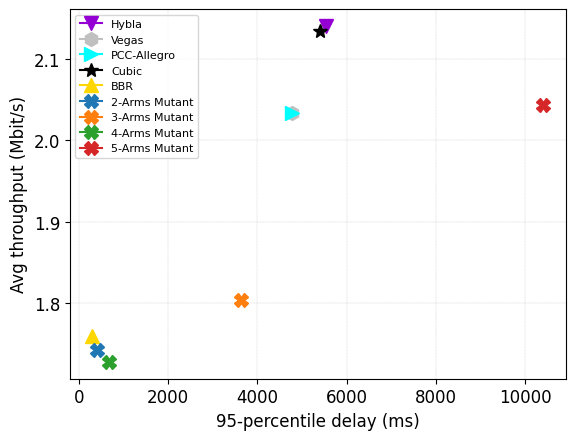

516.622075 30.252673428810997
453.952925 29.839672211633996
453.952925 29.839672211633996
453.9492 29.778377858042
24.621275 23.03897928392
163.18237499999992 25.1514475016
340.2682499999998 26.157358330648
306.26732499999997 25.665063098178
447.455625 24.536007005763


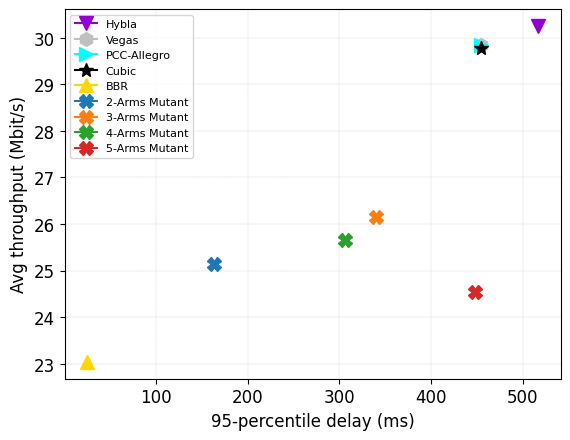

2965.9592499999985 7.616630735748
2373.352824999999 7.515192575671
2373.352824999999 7.515192575671
2399.3184499999993 7.521605487443
46.47669999999999 6.951583747867999
475.43922499999996 7.083746858966
911.394625 7.1462363018329995
1052.9392499999997 7.130183908569999
2154.762625 7.362109136149


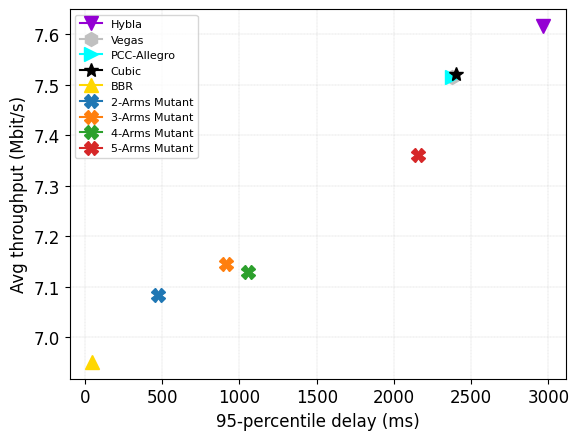

In [135]:
import numpy as np
from matplotlib import markers

all_traces = parse_traces_config()
all_traces = [t for t in all_traces['traces'].keys()]
markers = markers_json["schemes"]

# Get the features batch for each step
save = True
for t in traces:

    # Plot native
    for p in ["hybla", "vegas", "pcc", "cubic", "bbr"]:
        thruput, rtts, cwnds, _ = get_metrics(i_single_prot_dict[(p, t)])
        # thr_95_perc = np.mean(thruputs)
        delay_95_perc = np.percentile(rtts, 95)/2
        print(delay_95_perc, thruput)
        plt.plot(delay_95_perc, thruput, marker=markers[p]["marker"], label=markers[p]["name"], color=markers[p]["color"], markersize=10)

    # Get Cubic and BBR from Pantheon
    cubic_tput = p_tput_dict[("cubic", t)]
    cubic_delay = p_delay_dict[("cubic", t)]
    bbr_tput = p_tput_dict[("bbr", t)]
    bbr_delay = p_delay_dict[("bbr", t)]
    pcc_tput = p_tput_dict[("pcc", t)]
    pcc_delay = p_delay_dict[("pcc", t)]
    # plt.plot(cubic_delay, cubic_tput, marker=markers["cubic"]["marker"], label=markers["cubic"]["name"], color=markers["cubic"]["color"], markersize=10)
    # plt.plot(bbr_delay, bbr_tput, marker=markers["bbr"]["marker"], label=markers["bbr"]["name"], color=markers["bbr"]["color"], markersize=10)
    # plt.plot(pcc_delay, pcc_tput, marker=markers["pcc"]["marker"], label=markers["pcc"]["name"], color=markers["pcc"]["color"], markersize=10)

    # Plot mimic different arms
    for n_arms in [2, 3, 4, 5]:
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3
        elif n_arms == 4:
            i_dict = i_json_dict_4
        elif n_arms == 5:
            i_dict = i_json_dict_5

        thruput, rtts, cwnds, _ = get_metrics(i_dict[t])
        # thr_95_perc = np.mean(thruputs)
        delay_95_perc = np.percentile(rtts, 95)/2
        print(delay_95_perc, thruput)
        plt.plot(delay_95_perc, thruput, marker='X', label=markers[f"mimic-{n_arms}-arms"]["name"], markersize=10)
        # plt.title(t)
        plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    plt.xlabel('95-percentile delay (ms)')
    plt.ylabel('Avg throughput (Mbit/s)')
    plt.grid(linestyle='--', linewidth=0.2)
    plt.legend()
    if save:
        filename = f"bootstrapped_ucb.{t}.w_native_protocols.png"
        path = "/home/lorenzo/Desktop/mimic-2/analysis/plots/marginal_gains/"
        os.makedirs(path, exist_ok=True)
        plt.savefig(os.path.join(path, f"{filename}"))
    plt.show()

In [66]:
def cdf(x):
    N = len(x)

    # sort the data in ascending order
    x = np.sort(x)
    
    # get the cdf values of y
    y = np.arange(N) / float(N)

    return (x, y)

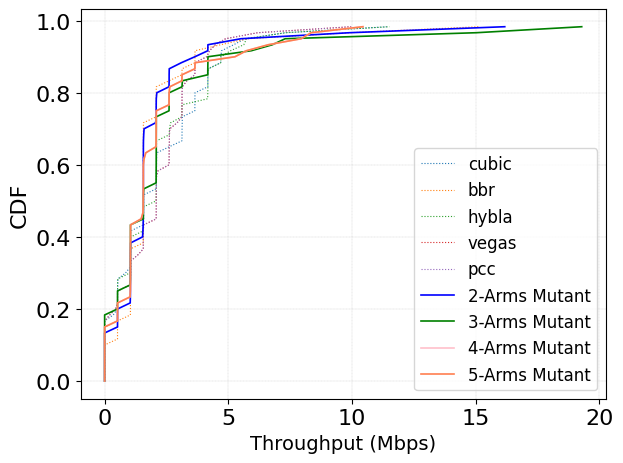

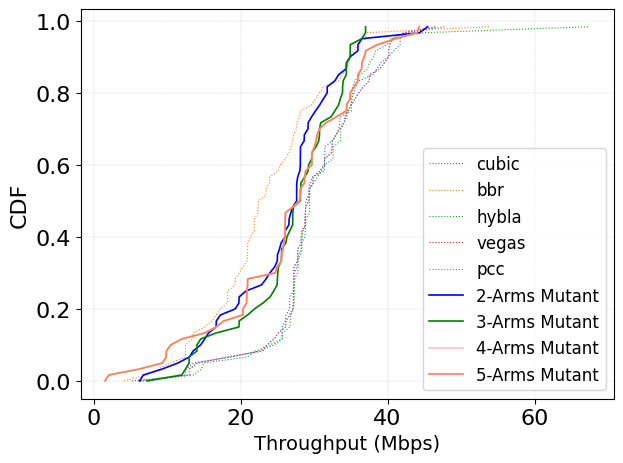

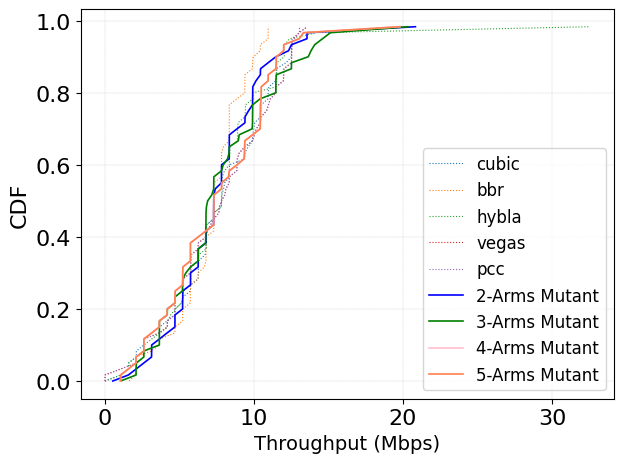

In [137]:
# CDFS
protocols = ["cubic", "bbr", "hybla", "vegas", "pcc"]
save = True
for t in traces:
    plt.figure()
    for p in protocols:
        thruput, rtts, cwnds, s_rate = get_metrics(i_single_prot_dict[p, t])
        (t_x, t_y) = cdf(s_rate)
        (r_x, r_y) = cdf(rtts)
        (c_x, c_y) = cdf(cwnds)
        plt.plot(t_x, t_y, label=p, linewidth=0.8, linestyle="dotted")

    # plt.subplot(1, 3, 1)
    
    # Plot mimic different arms
    for n_arms in [2, 3, 4, 5]:
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3
        elif n_arms == 4:
            i_dict = i_json_dict_4
        elif n_arms == 5:
            i_dict = i_json_dict_4

        thruput, rtts, cwnds, s_rate = get_metrics(i_dict[t])
        (t_x_2, t_y_2) = cdf(s_rate)
        (r_x_2, r_y_2) = cdf(rtts)
        (c_x_2, c_y_2) = cdf(cwnds)

        plt.plot(t_x_2, t_y_2, label=markers[f"mimic-{n_arms}-arms"]["name"],
                  linewidth=1.2, color=markers[f"mimic-{n_arms}-arms"]["color"])
        
        # plt.subplot(1, 3, 2)
        # plt.plot(r_x, r_y, label=p)
        # plt.xlabel('RTT (ms)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      
        # plt.subplot(1, 3, 3)
        # plt.plot(c_x, c_y, label=p)
        # plt.xlabel('Cwnd (Byte)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()

    # plt.title(t)
    # Show the plot
    plt.xlabel('Throughput (Mbps)', fontsize=14)
    plt.ylabel('CDF')
    # plt.title(t)
    plt.legend()
    plt.grid(linestyle='--', linewidth=0.2)

    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

    plt.tight_layout()

    if save:
        filename = f"bootstrapped_ucb.{t}.thruput_cdf.png"
        path = "/home/lorenzo/Desktop/mimic-2/analysis/plots/marginal_gains/"
        os.makedirs(path, exist_ok=True)
        plt.savefig(os.path.join(path, f"{filename}"))
    plt.show()


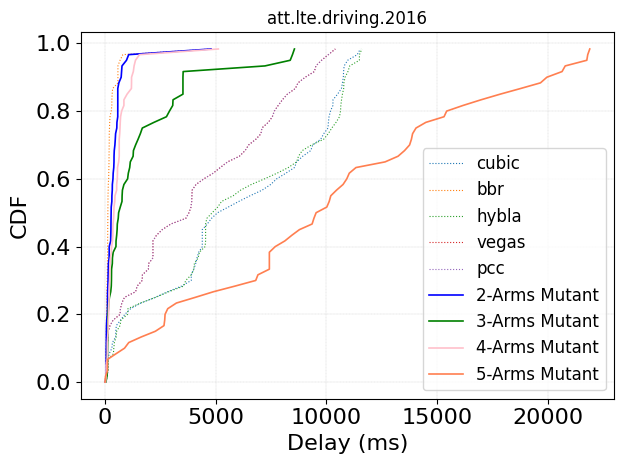

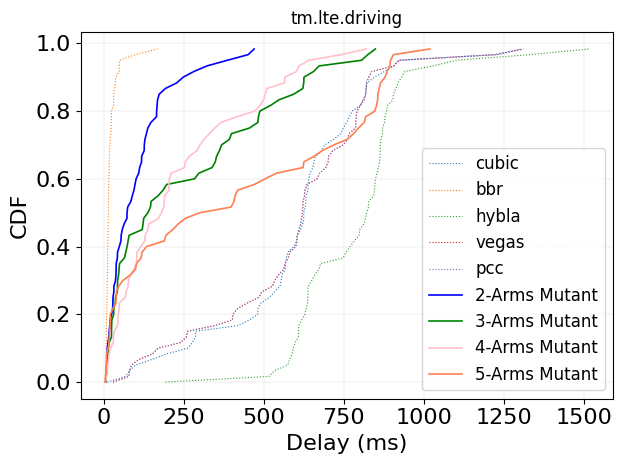

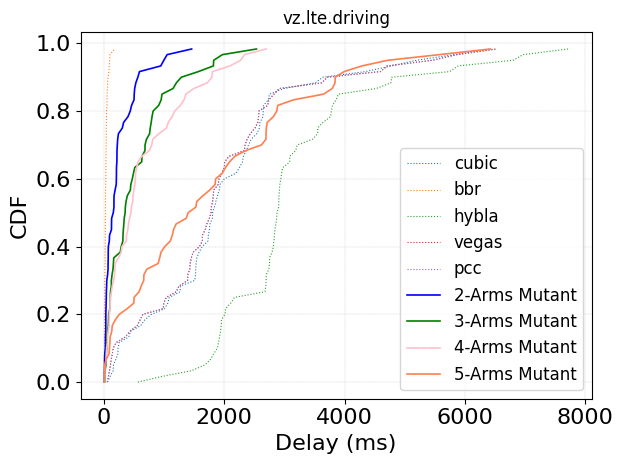

In [139]:
# CDFS
protocols = ["cubic", "bbr", "hybla", "vegas", "pcc"]
save = True
for t in traces:
    plt.figure()
    for p in protocols:
        thruput, rtts, cwnds, s_rate = get_metrics(i_single_prot_dict[p, t])
        # (t_x, t_y) = cdf(s_rate)
        (r_x, r_y) = cdf(rtts)
        # (c_x, c_y) = cdf(cwnds)
        plt.plot(r_x, r_y, label=p, linewidth=0.8, linestyle="dotted")

    # plt.subplot(1, 3, 1)
    
    # Plot mimic different arms
    for n_arms in [2, 3, 4, 5]:
        if n_arms == 2:
            i_dict = i_json_dict_2
        elif n_arms == 3:
            i_dict = i_json_dict_3
        elif n_arms == 4:
            i_dict = i_json_dict_4
        elif n_arms == 5:
            i_dict = i_json_dict_5

        thruput, rtts, cwnds, s_rate = get_metrics(i_dict[t])
        # (t_x_2, t_y_2) = cdf(s_rate)
        (r_x_2, r_y_2) = cdf(rtts)
        # (c_x_2, c_y_2) = cdf(cwnds)

        plt.plot(r_x_2, r_y_2, label=markers[f"mimic-{n_arms}-arms"]["name"],
                  linewidth=1.2, color=markers[f"mimic-{n_arms}-arms"]["color"])
        
        plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
        
        # plt.subplot(1, 3, 2)
        # plt.plot(r_x, r_y, label=p)
        # plt.xlabel('RTT (ms)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      
        # plt.subplot(1, 3, 3)
        # plt.plot(c_x, c_y, label=p)
        # plt.xlabel('Cwnd (Byte)')
        # plt.ylabel('CDF')
        # plt.title(t)
        # plt.legend()
      

    # Show the plot
    plt.xlabel('Delay (ms)')
    plt.ylabel('CDF')
    plt.title(t)
    plt.legend()
    plt.grid(linestyle='--', linewidth=0.2)
    plt.tight_layout()
    if save:
        filename = f"bootstrapped_ucb.{t}.delay_cdf.png"
        path = "/home/lorenzo/Desktop/mimic-2/analysis/plots/marginal_gains/"
        os.makedirs(path, exist_ok=True)
        plt.savefig(os.path.join(path, f"{filename}"))
    plt.show()




In [ ]:
for t in traces:
    
    mimic_thruput_2, mimic_rtts_2, _, _ = get_metrics(i_json_dict_2[t])
    mimic_thruput_3, mimic_rtts_3, _, _ = get_metrics(i_json_dict_3[t])
    mimic_thruput_4, mimic_rtts_4, _, _ = get_metrics(i_json_dict_4[t])
    cubic_thruput, cubic_rtts, _, _ = get_metrics(i_single_prot_dict["cubic",t])
    bbr_thruput, bbr_rtts, _, _ = get_metrics(i_single_prot_dict["bbr", t])
    hybla_thruput, hybla_rtts, _, _ = get_metrics(i_single_prot_dict["hybla", t])
    vegas_thruput, vegas_rtts, _, _ = get_metrics(i_single_prot_dict["vegas", t])

    mimic_delay_95_perc_2 = np.percentile(mimic_rtts_2, 95)
    mimic_delay_95_perc_3 = np.percentile(mimic_rtts_3, 95)
    mimic_delay_95_perc_4 = np.percentile(mimic_rtts_4, 95)
    cubic_delay_95_perc = np.percentile(cubic_rtts, 95)
    bbr_delay_95_perc = np.percentile(bbr_rtts, 95)
    hybla_delay_95_perc = np.percentile(hybla_rtts, 95)
    vegas_delay_95_perc = np.percentile(vegas_rtts, 95)


    cubic_power = cubic_thruput/cubic_delay_95_perc
    bbr_power = bbr_thruput/bbr_delay_95_perc
    vegas_power = vegas_thruput/vegas_delay_95_perc
    hybla_power = hybla_thruput/hybla_delay_95_perc
    mimic_power_2 = mimic_thruput_2/mimic_delay_95_perc_2
    mimic_power_3 = mimic_thruput_3/mimic_delay_95_perc_3
    mimic_power_4 = mimic_thruput_4/mimic_delay_95_perc_4

    # cubic_power = cubic_mean_rtt/cubic_thruput
    # bbr_power = bbr_mean_rtt/bbr_thruput
    # vegas_power = vegas_mean_rtt/vegas_thruput
    # hybla_power = hybla_mean_rtt/hybla_thruput
    # mimic_power = mimic_mean_rtt/mimic_thruput

    pw_ratios = [mimic_power_2, mimic_power_3, mimic_power_4, cubic_power, bbr_power, hybla_power, vegas_power]
    prots = [
        "Mimic-2",
        "Mimic-3",
        "Mimic-4", 
        markers["cubic"]["name"],
        markers["bbr"]["name"],
        markers["hybla"]["name"],
        markers["vegas"]["name"]
        ]

    plt.bar(prots, pw_ratios)
    plt.xlabel('Congestion Control Methods')
    plt.ylabel('Power Ratio')
    plt.title(t)
    plt.show()
    plt.tight_layout()
